In [1]:
%load_ext autoreload
%autoreload 2

import gsum as gm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from nuclear_matter.stats_utils import *
from nuclear_matter.matter import *
import seaborn as sns
import time
from itertools import product
from tqdm import tqdm

%matplotlib inline

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.family'] = 'serif'
mpl.rc('savefig', transparent=False, bbox='tight', pad_inches=0.05, format='pdf')

In [3]:
df = pd.read_csv('../data/all_matter_data.csv')
# Convert differences to total prediction at each MBPT order
mbpt_orders = ['Kin', 'MBPT_HF', 'MBPT_2', 'MBPT_3', 'MBPT_4']
df[mbpt_orders] = df[mbpt_orders].apply(np.cumsum, axis=1)
# 'total' is now unnecessary. Remove it.
df.pop('total');

In [4]:
# orders = np.array([0, 2, 3, 4])
# body2 = 'NN-only'
# body3 = 'NN+3N'
# Lambda = 450
# fits = {450: [1, 7], 500: [4, 10]}
# train1 = slice(None, None, 5)
# valid1 = slice(2, None, 5)
# # valid1 = np.array([i % 5 != 0 for i in range(len())])
# [fit_n2lo, fit_n3lo] = fits[Lambda]

# excluded = np.array([0, 1])

# savefigs = False

# Lb = 600

# breakdown_min = 300
# breakdown_max = 1000
# breakdown_num = 100
# Lb_vals = np.linspace(breakdown_min, breakdown_max, breakdown_num)
# Lb_logprior_vals = Lb_logprior(Lb_vals)

# ls_min = 0.1
# ls_max = 1.5
# ls_num = 50
# ls_vals = np.linspace(ls_min, ls_max, ls_num)
# # ls_min = ls_max = ls_num = ls_vals = None

# nugget = 1e-8

# kernel = RBF(length_scale=1, length_scale_bounds=(5e-2, 4)) + \
#     WhiteKernel(noise_level=nugget, noise_level_bounds='fixed')
# # kernel1 = RBF(length_scale=1, length_scale_bounds=(1e-2, 100)) + \
# #     WhiteKernel(noise_level=nugget, noise_level_bounds='fixed')
# kernel_theta = kernel.theta
# ref_2bf = 16




# mask_fit = np.isin(df['fit'], fits[Lambda]) | np.isnan(df['fit'])

# mask_2bf = \
#     (df['Body'] == body2) & \
#     mask_fit & \
#     (df['Lambda'] == Lambda)

# mask_3bf = \
#     (df['Body'] == body3) & \
#     mask_fit & \
#     (df['Lambda'] == Lambda)


# # df_fit = df[mask_fit]
# df_n_2bf = df[mask_2bf & (df['x'] == 0)]
# df_s_2bf = df[mask_2bf & (df['x'] == 0.5)]
# df_n_2_plus_3bf = df[mask_3bf & (df['x'] == 0)]
# df_s_2_plus_3bf = df[mask_3bf & (df['x'] == 0.5)]

# kf_n = df_n_2bf[df_n_2bf['OrderEFT'] == 'LO']['kf'].values
# kf_s = df_s_2bf[df_s_2bf['OrderEFT'] == 'LO']['kf'].values
# density = df_n_2bf[df_n_2bf['OrderEFT'] == 'LO']['n'].values
# # kf_d = kf_n.copy()

# # valid1 = np.arange(len(kf_n)) % 5 != 0

# Kf_n = kf_n[:, None]
# Kf_s = kf_s[:, None]
# # Kf_d = kf_d[:, None]

# kf_n_dense = np.linspace(kf_n.min(), kf_n.max(), 100)
# Kf_n_dense = kf_n_dense[:, None]

# kf_s_dense = np.linspace(kf_s.min(), kf_s.max(), 100)
# Kf_s_dense = kf_s_dense[:, None]

# # kf_d_dense = np.linspace(kf_d.min(), kf_d.max(), 100)
# # Kf_d_dense = kf_d_dense[:, None]


# ref_n_3bf = 16 * kf_n**3
# ref_s_3bf = 16 * kf_s**3
# # ref_d_3bf = 16 * kf_d**3

# # ref_n_3bf = 8 * kf_n**6
# # ref_s_3bf = 8 * kf_s**6
# # ref_d_3bf = 8 * kf_d**6


# y_n_2bf = np.array([
#     df_n_2bf[df_n_2bf['OrderEFT'] == order]['MBPT_4'].values
#     for order in df_n_2bf['OrderEFT'].unique()
# ]).T
# y_s_2bf = np.array([
#     df_s_2bf[df_s_2bf['OrderEFT'] == order]['MBPT_4'].values
#     for order in df_s_2bf['OrderEFT'].unique()
# ]).T
# y_d_2bf = y_n_2bf - y_s_2bf

# y_n_2_plus_3bf = np.array([
#     df_n_2_plus_3bf[df_n_2_plus_3bf['OrderEFT'] == order]['MBPT_4'].values
#     for order in df_n_2_plus_3bf['OrderEFT'].unique()
# ]).T
# y_s_2_plus_3bf = np.array([
#     df_s_2_plus_3bf[df_s_2_plus_3bf['OrderEFT'] == order]['MBPT_4'].values
#     for order in df_s_2_plus_3bf['OrderEFT'].unique()
# ]).T
# y_d_2_plus_3bf = y_n_2_plus_3bf - y_s_2_plus_3bf


# y_n_3bf = y_n_2_plus_3bf - y_n_2bf
# y_s_3bf = y_s_2_plus_3bf - y_s_2bf
# y_d_3bf = y_d_2_plus_3bf - y_d_2bf

In [5]:
orders = np.array([0, 2, 3, 4])
body2 = 'NN-only'
body23 = 'NN+3N'
body3 = '3N'

pure_neutron = 'pure'
sym_nuclear = 'sym'
# avg_momentum = 'avg'
s2_energy = 's2'

Lambda = 450
fits = {450: [1, 7], 500: [4, 10]}
train1 = slice(None, None, 5)
valid1 = slice(2, None, 5)
# valid1 = np.array([i % 5 != 0 for i in range(len())])
[fit_n2lo, fit_n3lo] = fits[Lambda]

excluded_2bf = np.array([0, 1])
excluded_3bf = np.array([0, 1, 2])

savefigs = False

Lb = 600

breakdown_min = 300
breakdown_max = 1000
breakdown_num = 100
Lb_vals = np.linspace(breakdown_min, breakdown_max, breakdown_num)
Lb_logprior_vals = Lb_logprior(Lb_vals)

ls_min = 0.1
ls_max = 1.5
ls_num = 50
ls_vals = np.linspace(ls_min, ls_max, ls_num)
# ls_min = ls_max = ls_num = ls_vals = None

nugget = 1e-8

kernel = RBF(length_scale=1, length_scale_bounds=(5e-2, 4)) + \
    WhiteKernel(noise_level=nugget, noise_level_bounds='fixed')
# kernel1 = RBF(length_scale=1, length_scale_bounds=(1e-2, 100)) + \
#     WhiteKernel(noise_level=nugget, noise_level_bounds='fixed')
kernel_theta = kernel.theta
ref_2bf = 16

hyperparams = dict(
    center=0,
    disp=0,
    df=5,
    scale=1
)


mask_fit = np.isin(df['fit'], fits[Lambda]) | np.isnan(df['fit'])

mask_2bf = \
    (df['Body'] == body2) & \
    mask_fit & \
    (df['Lambda'] == Lambda)

mask_23bf = \
    (df['Body'] == body23) & \
    mask_fit & \
    (df['Lambda'] == Lambda)


# df_fit = df[mask_fit]
df_n_2bf = df[mask_2bf & (df['x'] == 0)]
df_s_2bf = df[mask_2bf & (df['x'] == 0.5)]
df_n_2_plus_3bf = df[mask_23bf & (df['x'] == 0)]
df_s_2_plus_3bf = df[mask_23bf & (df['x'] == 0.5)]

kf_n = df_n_2bf[df_n_2bf['OrderEFT'] == 'LO']['kf'].values
kf_s = df_s_2bf[df_s_2bf['OrderEFT'] == 'LO']['kf'].values
kf_avg = (kf_n + kf_s) / 2.
density = df_n_2bf[df_n_2bf['OrderEFT'] == 'LO']['n'].values
# kf_d = kf_n.copy()

# valid1 = np.arange(len(kf_n)) % 5 != 0

Kf_n = kf_n[:, None]
Kf_s = kf_s[:, None]
Kf_avg = kf_avg[:, None]
# Kf_d = kf_d[:, None]

kf_n_dense = np.linspace(kf_n.min(), kf_n.max(), 100)
Kf_n_dense = kf_n_dense[:, None]

kf_s_dense = np.linspace(kf_s.min(), kf_s.max(), 100)
Kf_s_dense = kf_s_dense[:, None]

kf_avg_dense = np.linspace(kf_avg.min(), kf_avg.max(), 100)
Kf_avg_dense = kf_avg_dense[:, None]


ref_n_3bf_vals = 16 * kf_n**3
ref_s_3bf_vals = 16 * kf_s**3
ref_avg_3bf_vals = 16 * kf_avg**3
# ref_d_3bf = 16 * kf_d**3

# ref_n_3bf = 8 * kf_n**6
# ref_s_3bf = 8 * kf_s**6
# ref_d_3bf = 8 * kf_d**6


y_n_2bf = np.array([
    df_n_2bf[df_n_2bf['OrderEFT'] == order]['MBPT_4'].values
    for order in df_n_2bf['OrderEFT'].unique()
]).T
y_s_2bf = np.array([
    df_s_2bf[df_s_2bf['OrderEFT'] == order]['MBPT_4'].values
    for order in df_s_2bf['OrderEFT'].unique()
]).T
y_d_2bf = y_n_2bf - y_s_2bf

y_n_2_plus_3bf = np.array([
    df_n_2_plus_3bf[df_n_2_plus_3bf['OrderEFT'] == order]['MBPT_4'].values
    for order in df_n_2_plus_3bf['OrderEFT'].unique()
]).T
y_s_2_plus_3bf = np.array([
    df_s_2_plus_3bf[df_s_2_plus_3bf['OrderEFT'] == order]['MBPT_4'].values
    for order in df_s_2_plus_3bf['OrderEFT'].unique()
]).T
y_d_2_plus_3bf = y_n_2_plus_3bf - y_s_2_plus_3bf


y_n_3bf = y_n_2_plus_3bf - y_n_2bf
y_s_3bf = y_s_2_plus_3bf - y_s_2bf
y_d_3bf = y_d_2_plus_3bf - y_d_2bf

In [6]:
Q_n = ratio_kf(Kf_n, breakdown=Lb)
Q_s = ratio_kf(Kf_s, breakdown=Lb)
# Q_d = ratio_kf(Kf_d, breakdown=Lb)

In [7]:
coeffs_n_2_plus_3bf = gm.coefficients(y_n_2_plus_3bf, Q_n, ref_2bf, orders=orders)
coeffs_s_2_plus_3bf = gm.coefficients(y_s_2_plus_3bf, Q_s, ref_2bf, orders=orders)
# coeffs_d_2_plus_3bf = gm.coefficients(y_d_2_plus_3bf, Q_d, ref_2bf, orders=orders)

coeffs_n_2bf = gm.coefficients(y_n_2bf, Q_n, ref_2bf, orders=orders)
coeffs_s_2bf = gm.coefficients(y_s_2bf, Q_s, ref_2bf, orders=orders)
# coeffs_d_2bf = gm.coefficients(y_d_2bf, Q_d, ref_2bf, orders=orders)

coeffs_n_3bf = gm.coefficients(y_n_3bf, Q_n, ref_n_3bf_vals, orders=orders)
coeffs_s_3bf = gm.coefficients(y_s_3bf, Q_s, ref_s_3bf_vals, orders=orders)
# coeffs_d_3bf = gm.coefficients(y_d_3bf, Q_d, ref_d_3bf, orders=orders)

In [8]:
cmaps = [plt.get_cmap(name) for name in ['Oranges', 'Greens', 'Blues', 'Reds']]
colors = [cmap(0.55 - 0.1 * (i == 0)) for i, cmap in enumerate(cmaps)]

In [9]:
# use_kf = True

kf_x_label = r'$k_F$ [fm$^{-1}$]'
density_x_label = r'$\rho$ [fm$^{-3}$]'

# if use_kf:
#     x_n = kf_n
#     x_s = kf_s
#     x_d = kf_d
#     x_label = kf_x_label
#     x_save = 'use-kf'
# else:
#     x_n = x_s = x_d = density
#     x_label = density_x_label
    
#     x_save = 'use-rho'

In [10]:
def plot_coefficients(kf, d, coeffs_2bf, coeffs_3bf, coeffs_23bf, orders, colors):
    fig, axes = plt.subplots(2, 2, figsize=(7, 4.5), sharey=True, sharex='col')
    for i, n in enumerate(orders):

        axes[0, 0].plot(kf, coeffs_23bf[:, i], c=colors[i], label=fr'$c_{n}^{{(2+3)}}$')
        axes[1, 0].plot(kf, coeffs_2bf[:, i], c=colors[i], label=fr'$c_{n}^{{(2)}}$')
        if n > 2:
            axes[1, 0].plot(kf, coeffs_3bf[:, i], c=colors[i], ls='--', label=fr'$c_{n}^{{(3)}}$')

        axes[0, 1].plot(d, coeffs_23bf[:, i], c=colors[i], label=fr'$c_{n}^{{(2+3)}}$')
        axes[1, 1].plot(d, coeffs_2bf[:, i], c=colors[i], label=fr'$c_{n}^{{(2)}}$')
        if n > 2:
            axes[1, 1].plot(d, coeffs_3bf[:, i], c=colors[i], ls='--', label=fr'$c_{n}^{{(3)}}$')

    for ax in axes.ravel():
        ax.axhline(0, 0, 1, c='lightgrey', zorder=0)
        ax.tick_params(direction='in')
    axes[1, 0].set_xlabel(kf_x_label)
    axes[1, 1].set_xlabel(density_x_label)
    axes[0, 0].legend(ncol=2)
    axes[1, 0].legend(ncol=3)
    fig.tight_layout(h_pad=0.3, w_pad=0.3)
    return fig, axes

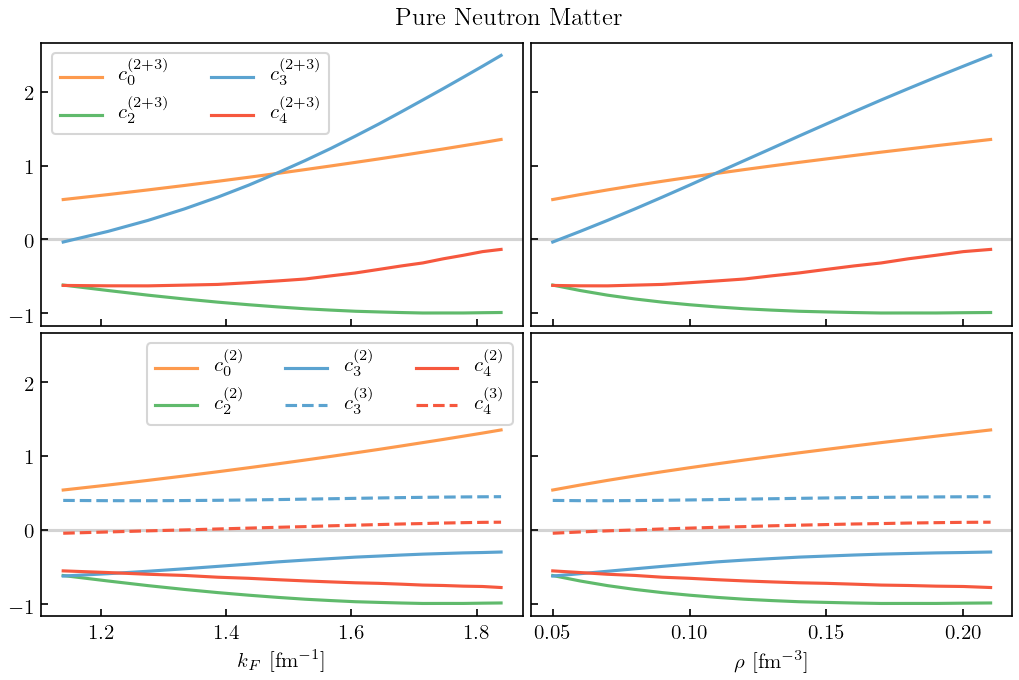

In [11]:
fig, axes = plot_coefficients(
    kf_n, density, coeffs_2bf=coeffs_n_2bf, coeffs_3bf=coeffs_n_3bf,
    coeffs_23bf=coeffs_n_2_plus_3bf, orders=orders, colors=colors)
fig.suptitle('Pure Neutron Matter', y=1.02)

fig.savefig(f'coeffs_neutron_matter_compare_2bf_3bf')

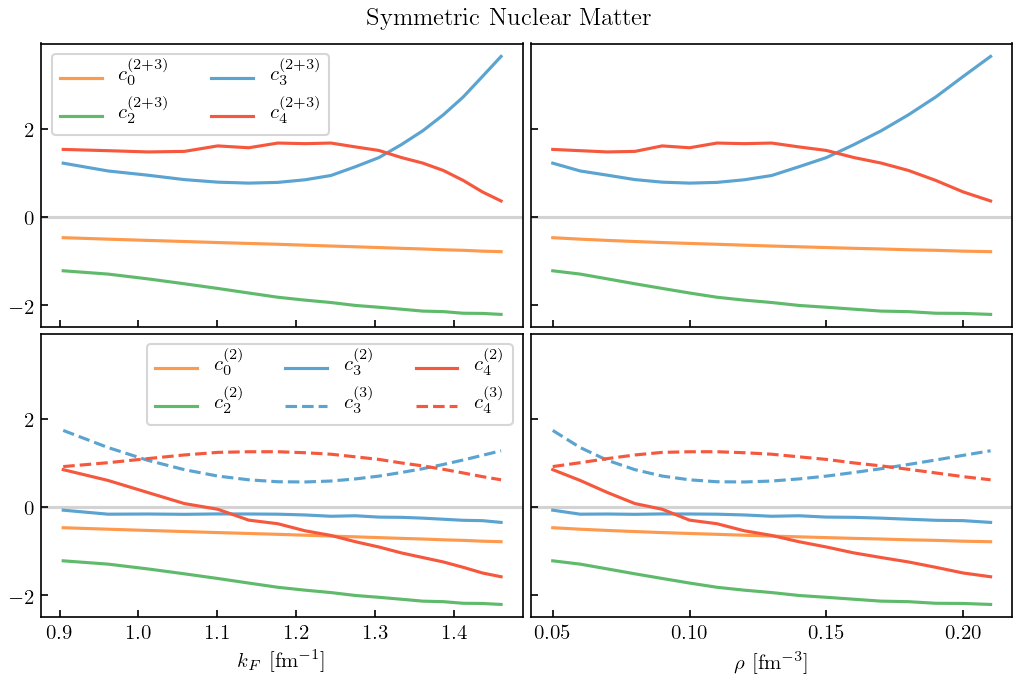

In [12]:
fig, axes = plot_coefficients(
    kf_s, density, coeffs_2bf=coeffs_s_2bf, coeffs_3bf=coeffs_s_3bf,
    coeffs_23bf=coeffs_s_2_plus_3bf, orders=orders, colors=colors)
fig.suptitle('Symmetric Nuclear Matter', y=1.02)
fig.savefig(f'coeffs_nuclear_matter_compare_2bf_3bf')

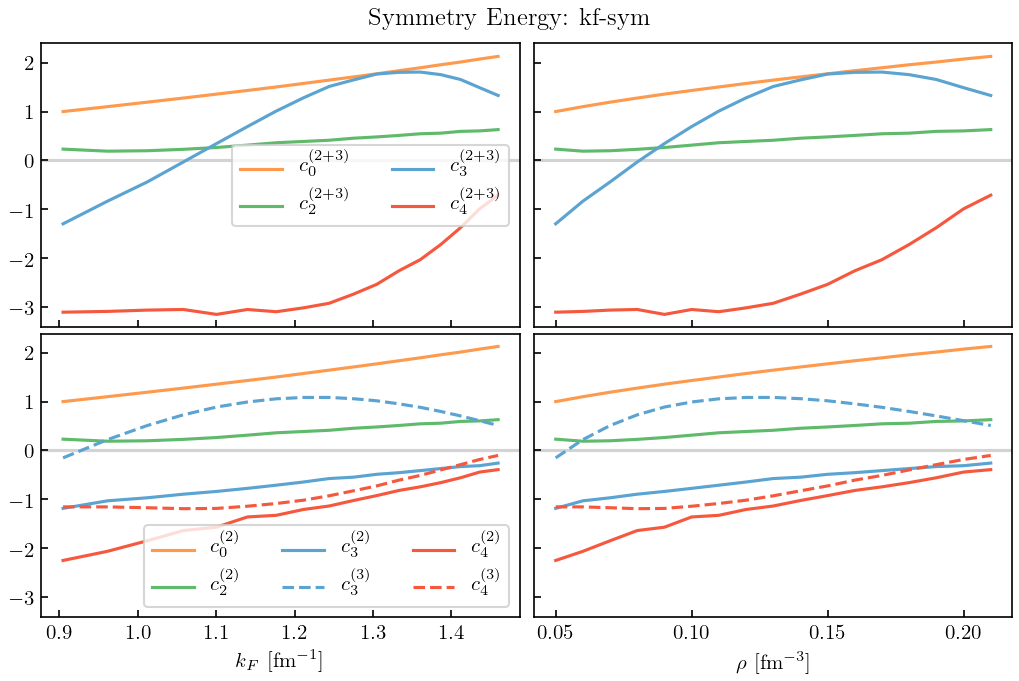

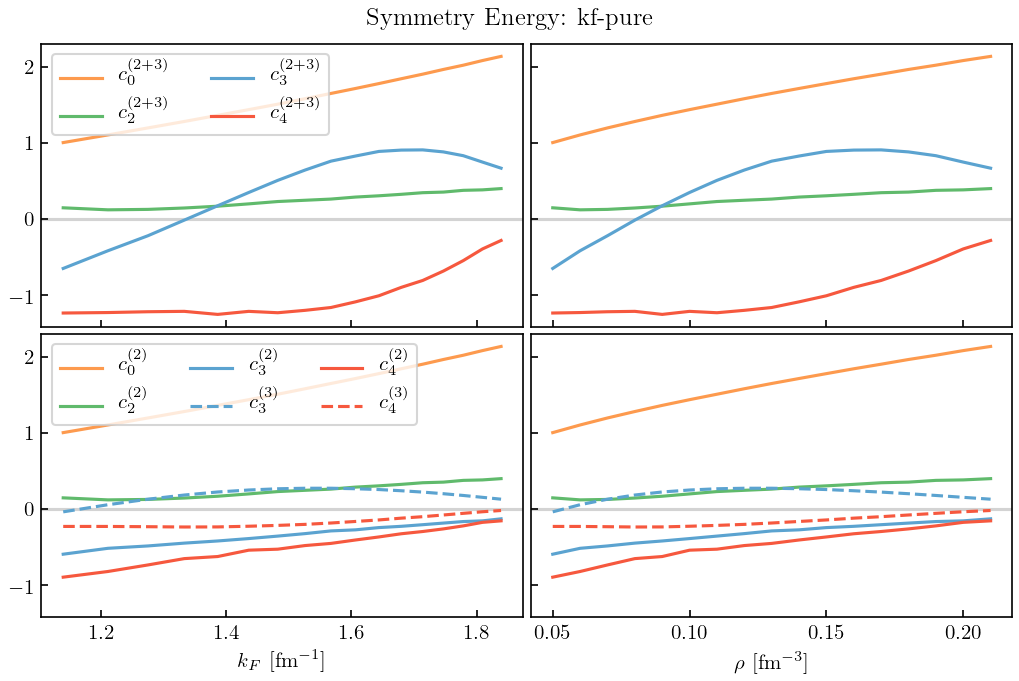

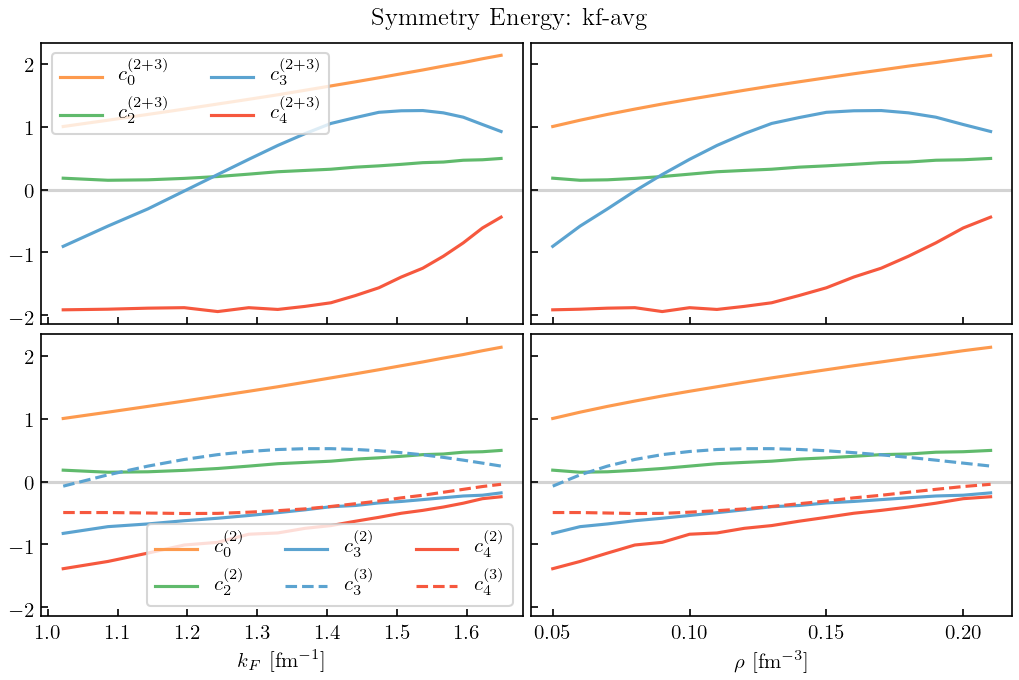

In [13]:
for kf_type_, kf_i in zip(['kf-sym', 'kf-pure', 'kf-avg'], [kf_s, kf_n, (kf_s+kf_n)/2.]):
    
    Q_d_i = ratio_kf(kf_i[:, None], breakdown=Lb)
    ref_d_3bf_i = 16 * kf_i**3
    coeffs_d_2_plus_3bf_i = gm.coefficients(y_d_2_plus_3bf, Q_d_i, ref_2bf, orders=orders)
    coeffs_d_2bf_i = gm.coefficients(y_d_2bf, Q_d_i, ref_2bf, orders=orders)
    coeffs_d_3bf_i = gm.coefficients(y_d_3bf, Q_d_i, ref_d_3bf_i, orders=orders)
    
    fig, axes = plot_coefficients(
        kf_i, density, coeffs_2bf=coeffs_d_2bf_i, coeffs_3bf=coeffs_d_3bf_i,
        coeffs_23bf=coeffs_d_2_plus_3bf_i, orders=orders, colors=colors)

    fig.suptitle(f'Symmetry Energy: {kf_type_}', y=1.02)
    fig.savefig(f'coeffs_symmetry_energy_compare_2bf_3bf_{kf_type_}')

## Convergence Analysis

In [14]:
def ref_cubic_3bf(X):
    """Compute 16 kf^3 for any kf prescription"""
    return 16 * X.ravel() ** 3

In [15]:
fermi_momenta = {
    pure_neutron: kf_n,
    sym_nuclear: kf_s,
    s2_energy: kf_avg
}

Fermi_momenta = {
    pure_neutron: Kf_n,
    sym_nuclear: Kf_s,
    s2_energy: Kf_avg
}

refs = {
    # E/N
    (pure_neutron, body2): ref_2bf,
    (pure_neutron, body3): ref_cubic_3bf,
    (pure_neutron, body23): ref_2bf,
    # E/A
    (sym_nuclear, body2): ref_2bf,
    (sym_nuclear, body3): ref_cubic_3bf,
    (sym_nuclear, body23): ref_2bf,
    # S2
    (s2_energy, body2): ref_2bf,
    (s2_energy, body3): ref_cubic_3bf,
    (s2_energy, body23): ref_2bf,
}

# S2_observables = {
#     body2: y_d_2bf,
#     body3: y_d_3bf,
#     body23: y_d_2_plus_3bf,
# }
observables = {
    # E/N
    (pure_neutron, body2): y_n_2bf,
    (pure_neutron, body3): y_n_3bf,
    (pure_neutron, body23): y_n_2_plus_3bf,
    # E/A
    (sym_nuclear, body2): y_s_2bf,
    (sym_nuclear, body3): y_s_3bf,
    (sym_nuclear, body23): y_s_2_plus_3bf,
    # S2
    (s2_energy, body2): y_d_2bf,
    (s2_energy, body3): y_d_3bf,
    (s2_energy, body23): y_d_2_plus_3bf,
}

excluded_orders = {
    body2: excluded_2bf,
    body3: excluded_3bf,
    body23: excluded_2bf,
}

obs_types = [pure_neutron, sym_nuclear, s2_energy]
systems = {pure_neutron: 'neutron', sym_nuclear: 'symmetric', s2_energy: 'difference'}
body_types = [body2, body3, body23]

In [16]:
analyses = {}

with tqdm(total=len(obs_types) * len(body_types)) as pbar:
    for obs_type, n_body in product(obs_types, body_types):
        pbar.set_postfix(obs_type=obs_type, n_body=n_body, refresh=True)
        X_i = Fermi_momenta[obs_type]
        y_i = observables[obs_type, n_body]
        ref_i = refs[obs_type, n_body]
        ex_i = excluded_orders[n_body]
        system_i = systems[obs_type]

        analyses[obs_type, n_body] = MatterConvergenceAnalysis(
            X=X_i, y=y_i, orders=orders, train=train1, valid=valid1, ref=ref_i, ratio='kf', density=density,
            kernel=kernel, system=system_i, fit_n2lo=fit_n2lo, fit_n3lo=fit_n3lo, Lambda=Lambda,
            body=n_body, savefigs=savefigs, excluded=ex_i, **hyperparams
        )
        analyses[obs_type, n_body].setup_posteriors(
            breakdown_min=breakdown_min, breakdown_max=breakdown_max, breakdown_num=breakdown_num,
            ls_min=ls_min, ls_max=ls_max, ls_num=ls_num,
            max_idx=[2, 3], logprior=None
        )
        pbar.update(1)

100%|██████████| 9/9 [01:47<00:00, 11.95s/it, n_body=NN+3N, obs_type=s2]    


In [17]:
def create_breakdown_df(analyses, body_types, obs_type):
    df_Lb_pdfs = pd.concat([analyses[obs_type, n_body].df_breakdown for n_body in body_types])
#     df_Lb_pdfs['$k_F$'] = kf_type_name
    grouped = df_Lb_pdfs[df_Lb_pdfs['Body'] != 'NN+3N'].groupby(
        ['$\Lambda_b$ (MeV)', 'Order', 'system'], sort=False
    )
    prod_df = grouped.prod().reset_index()
    prod_df['Body'] = 'Total'
    return pd.concat([df_Lb_pdfs, prod_df], sort=False)

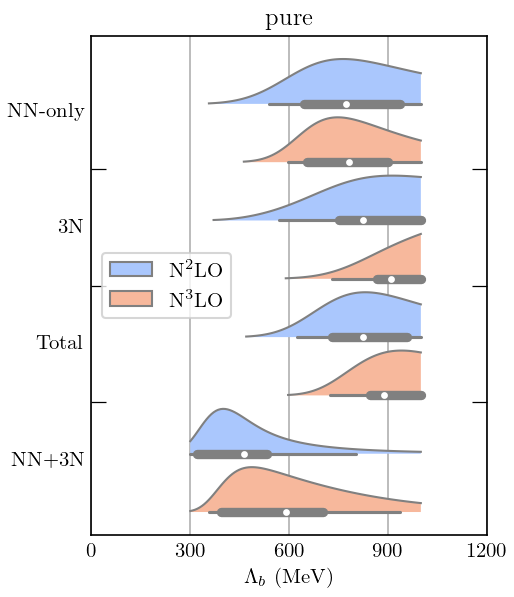

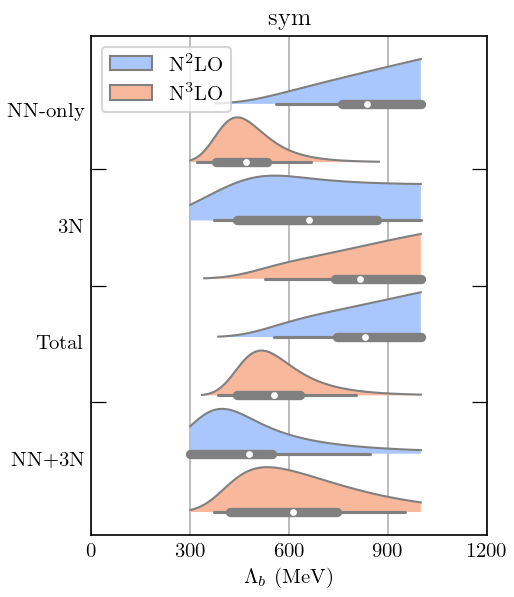

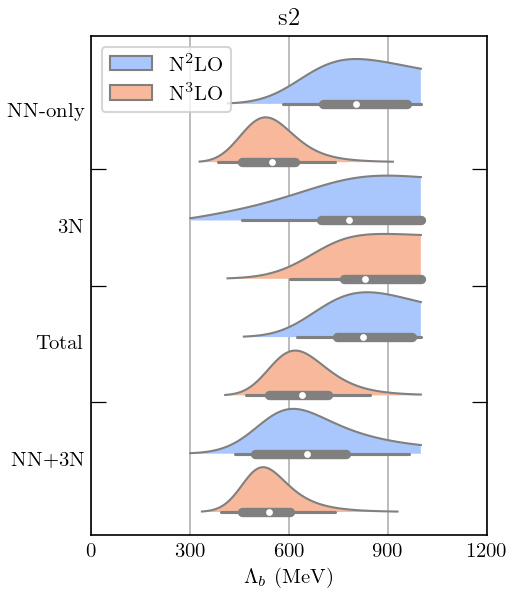

In [18]:
df_Lb_pdfs_n = create_breakdown_df(analyses, body_types, pure_neutron)
df_Lb_pdfs_s = create_breakdown_df(analyses, body_types, sym_nuclear)
df_Lb_pdfs_d = create_breakdown_df(analyses, body_types, s2_energy)


df_Lb_pdf = pd.concat([df_Lb_pdfs_n, df_Lb_pdfs_s, df_Lb_pdfs_d])


for obs_type, df_lb_i in zip(obs_types, [df_Lb_pdfs_n, df_Lb_pdfs_s, df_Lb_pdfs_d]):
    fig, ax = plt.subplots(figsize=(3.4, 4.4))
    ax = pdfplot(
        x=r'$\Lambda_b$ (MeV)', y='Body', pdf='pdf', data=df_lb_i, hue='Order',
        order=[*body_types[:-1], 'Total', body_types[-1]], hue_order=[r'N$^2$LO', r'N$^3$LO'], cut=1e-2, linewidth=1,
            palette="coolwarm", saturation=1., ax=ax, margin=0.3,
    )
    ax.set_xlim(0, 1200)
    ax.set_xticks([0, 300, 600, 900, 1200])
    ax.grid(axis='x')
    ax.set_title(f'{obs_type}')
    ax.set_axisbelow(True)
    plt.show()
#     fig.savefig(f'breakdown_obs-{obs_type}')

In [19]:
df_Lb_pdfs_n

,$\Lambda_b$ (MeV),pdf,Order,system,Body
0,300.000000,0.000003,N$^2$LO,$E/N$,NN-only
1,307.070707,0.000004,N$^2$LO,$E/N$,NN-only
2,314.141414,0.000006,N$^2$LO,$E/N$,NN-only
3,321.212121,0.000008,N$^2$LO,$E/N$,NN-only
4,328.282828,0.000010,N$^2$LO,$E/N$,NN-only
...,...,...,...,...,...
195,971.717172,0.000009,N$^3$LO,$E/N$,Total
196,978.787879,0.000009,N$^3$LO,$E/N$,Total
197,985.858586,0.000009,N$^3$LO,$E/N$,Total
198,992.929293,0.000009,N$^3$LO,$E/N$,Total


In [20]:
df_Lb_pdf

,$\Lambda_b$ (MeV),pdf,Order,system,Body
0,300.000000,3.003762e-06,N$^2$LO,$E/N$,NN-only
1,307.070707,4.171540e-06,N$^2$LO,$E/N$,NN-only
2,314.141414,5.694560e-06,N$^2$LO,$E/N$,NN-only
3,321.212121,7.647591e-06,N$^2$LO,$E/N$,NN-only
4,328.282828,1.011271e-05,N$^2$LO,$E/N$,NN-only
...,...,...,...,...,...
195,971.717172,7.232814e-08,N$^3$LO,$S_2$,Total
196,978.787879,6.648893e-08,N$^3$LO,$S_2$,Total
197,985.858586,6.115102e-08,N$^3$LO,$S_2$,Total
198,992.929293,5.626909e-08,N$^3$LO,$S_2$,Total


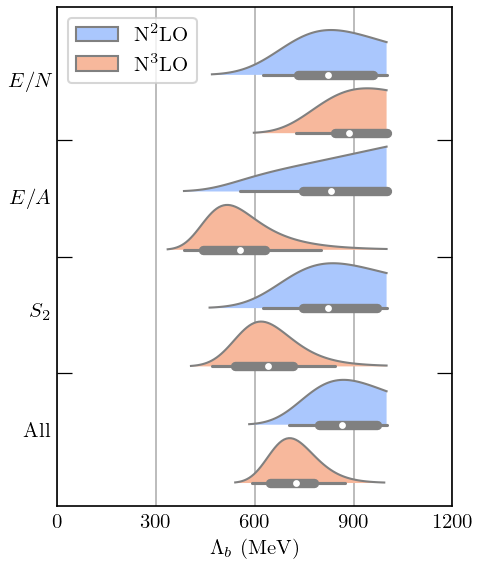

In [23]:
df_Lb_pdf_all = df_Lb_pdfs_n.copy()
df_Lb_pdf_all['pdf'] = df_Lb_pdfs_n['pdf'] * df_Lb_pdfs_s['pdf'] * df_Lb_pdfs_d['pdf']
df_Lb_pdf_all['system'] = 'All'
df_Lb_pdf = pd.concat([df_Lb_pdfs_n, df_Lb_pdfs_s, df_Lb_pdfs_d, df_Lb_pdf_all])

fig, ax = plt.subplots(figsize=(3.4, 4.4))
ax = pdfplot(
    x=r'$\Lambda_b$ (MeV)', y='system', pdf='pdf', data=df_Lb_pdf[df_Lb_pdf['Body'] == 'Total'], hue='Order',
    order=[r'$E/N$', r'$E/A$', r'$S_2$', 'All'], hue_order=[r'N$^2$LO', r'N$^3$LO'], cut=1e-2, linewidth=1,
    palette="coolwarm", saturation=1., ax=ax, margin=0.3,
)
ax.set_xlim(0, 1200)
ax.set_xticks([0, 300, 600, 900, 1200])
ax.grid(axis='x')
# ax.set_title(f'{obs_type}')
ax.set_axisbelow(True)
plt.show()